# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

### Your tasks
* Import data from the provided [GitHub repo](https://github.com/udacity/CD13649-Project/tree/main/Project) using `pandas`. For your convenience, the data files (CSVs) are also present in the current workspace at the path **CD13649-Project/Project/**. Here are the data files to import: 
  1. GDP (**GDP.csv**)
  2. Inflation (**inflation_monthly.csv**)
  3. Apple stock prices (**apple_historical_data.csv**)
  4. Microsoft stock prices (**microsoft_historical_data.csv**)
  5. Consumer price index (**consumer_price_index.csv**)



* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`


* You may need to change column names to make them easier to work with


* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method



In [2]:
# List of raw URLs for the files
file_urls = [
    "https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/GDP.csv",
    "https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/apple_historical_data.csv",
    "https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/microsoft_historical_data.csv",
    "https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/consumer_price_index.csv",
    "https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/inflation_monthly.csv"
]

# Read and store DataFrames in a list
dfs = []
for url in file_urls:
    try:
        df = pd.read_csv(url, delimiter=",", skipinitialspace=True, engine="python", on_bad_lines="warn")
        dfs.append(df)
    except Exception as e:
        print(f"Error loading {url}: {e}")

# Unpack DataFrames if successful and name each dataframe
if len(dfs) == len(file_urls):
    gdp, apple, microsoft, consumer, inflation = dfs
else:
    print("Error: Not all DataFrames were loaded successfully.")


In [3]:
# Change all date column names to Date
        
for df, name in zip(dfs, ["gdp", "apple", "microsoft", "consumer", "inflation"]):
    # Check if 'DATE' column exists
    if 'DATE' in df.columns:
        df.rename(columns={'DATE': 'Date'}, inplace=True)


In [4]:
dfs[0]

,Date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
304,2023-01-01,26813.601
305,2023-04-01,27063.012
306,2023-07-01,27610.128
307,2023-10-01,27956.998


In [5]:
dfs[1]

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10
...,...,...,...,...,...,...
2512,5/12/2014,$21.17,212736019,$20.98,$21.20,$20.98
2513,5/9/2014,$20.91,291068564,$20.88,$20.94,$20.73
2514,5/8/2014,$21.00,228973884,$21.01,$21.23,$20.94
2515,5/7/2014,$21.15,282128727,$21.26,$21.33,$20.99


In [6]:
# Check the first few rows of data
gdp.head()

,Date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [7]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [8]:
microsoft.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


In [9]:
consumer.head()

,Date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [10]:
inflation.head()

,Date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [11]:
inflation.columns

Index(['Date', 'CORESTICKM159SFRBATL'], dtype='object')

In [12]:
# Load the historical stock price data for Apple and Microsoft
microsoft.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


In [13]:
# Use methods like .info() and .describe() to explore the data

In [14]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [15]:
microsoft.describe()

,Volume
count,2.517000e+03
mean,2.953106e+07
std,1.370138e+07
min,7.425603e+06
25%,2.131892e+07
50%,2.639470e+07
75%,3.360003e+07
max,2.025141e+08


In [16]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [17]:
apple.describe()

,Volume
count,2.517000e+03
mean,1.277394e+08
std,7.357405e+07
min,2.404834e+07
25%,7.741776e+07
50%,1.077601e+08
75%,1.567789e+08
max,7.576780e+08


In [18]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2514 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [19]:
apple.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [20]:
# Check for nulls 

for i, df in enumerate(dfs, start=1):
    if df.isnull().values.any():
        print(f"DataFrame {i} contains null values.")
    else:
        print(f"DataFrame {i} has no null values.")


DataFrame 1 has no null values.
DataFrame 2 contains null values.
DataFrame 3 has no null values.
DataFrame 4 has no null values.
DataFrame 5 has no null values.


In [21]:
apple.isnull().sum()

Date          0
Close/Last    3
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [22]:
# Forward fill only specific columns

apple.loc[:, 'Close/Last'] = apple['Close/Last'].ffill()

In [23]:
# Check again for nulls after using forward fill

for i, df in enumerate(dfs, start=1):
    if df.isnull().values.any():
        print(f"DataFrame {i} contains null values.")
    else:
        print(f"DataFrame {i} has no null values.")

DataFrame 1 has no null values.
DataFrame 2 has no null values.
DataFrame 3 has no null values.
DataFrame 4 has no null values.
DataFrame 5 has no null values.


In [24]:
apple.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [25]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    for col in numeric_columns:
        df[col] = df[col].replace({'\$': ''}, regex=True).astype(float)


In [26]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [27]:
microsoft.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


In [28]:
apple.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [29]:
# Apply the function to both DataFrames
convert_dollar_columns_to_numeric(apple, ['Close/Last', 'Open', 'High', 'Low'])
convert_dollar_columns_to_numeric(microsoft, ['Close/Last', 'Open', 'High', 'Low'])

In [30]:
# Verify changes

apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,183.38,163224100,186.65,187.00,182.66
1,5/2/2024,173.03,94214920,172.51,173.42,170.89
2,5/1/2024,169.30,50383150,169.58,172.71,169.11
3,4/30/2024,170.33,65934780,173.33,174.99,170.00
4,4/29/2024,173.50,68169420,173.37,176.03,173.10


In [31]:
microsoft.head()

,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,406.66,17446720,402.28,407.1500,401.8600
1,05/02/2024,397.84,17709360,397.66,399.9300,394.6515
2,05/01/2024,394.94,23562480,392.61,401.7199,390.3100
3,04/30/2024,389.33,28781370,401.49,402.1600,389.1700
4,04/29/2024,402.25,19582090,405.25,406.3200,399.1900


In [32]:
gdp.columns

Index(['Date', 'GDP'], dtype='object')

In [33]:
apple.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [34]:
microsoft.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [35]:
consumer.columns

Index(['Date', 'CORESTICKM159SFRBATL'], dtype='object')

In [36]:
inflation.columns

Index(['Date', 'CORESTICKM159SFRBATL'], dtype='object')

In [37]:
# Convert 'Date' column to datetime format in all DataFrames where it exists
for df in [gdp, apple, microsoft, consumer, inflation]:
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [38]:
# Use .info() and check the type of each column to ensure that the above steps worked

# Function to print DataFrame info
def check_dataframe_info(dfs, names):
    for df, name in zip(dfs, names):
        print(f"\n{name} DataFrame Info:")
        print(df.info())  # Print column types and non-null counts

# List of DataFrame names
df_names = ["gdp", "apple", "microsoft", "consumer", "inflation"]

# Check info for all DataFrames
check_dataframe_info(dfs, df_names)



gdp DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    309 non-null    datetime64[ns]
 1   GDP     309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB
None

apple DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
None

microsoft DataFrame Info:
<class 'pandas.core

## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [39]:
inflation.head(10)

,Date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245
5,1968-06-01,4.545569
6,1968-07-01,4.753076
7,1968-08-01,4.946607
8,1968-09-01,4.948247
9,1968-10-01,5.182592


In [40]:
inflation_monthend = inflation.copy()

In [41]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)

# Adjust to month-end using MonthEnd(0)
inflation_monthend['Date'] = inflation_monthend['Date'] + pd.offsets.MonthEnd(0)


In [42]:
# Verify changes

inflation_monthend.head(10)

,Date,CORESTICKM159SFRBATL
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245
5,1968-06-30,4.545569
6,1968-07-31,4.753076
7,1968-08-31,4.946607
8,1968-09-30,4.948247
9,1968-10-31,5.182592


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [43]:
# Create a new quarterly inflation dataframe by downsampling the monthly inflation data 
# to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values 
# from January, February, and March)


# make a copy of inflation
inflation_copy = inflation_monthend.copy()

# Set 'DATE' as the index for resampling
inflation_copy.set_index('Date', inplace=True)

# Resample to quarterly frequency and calculate the mean for each quarter
quarterly_inflation = inflation_copy.resample('Q').mean().reset_index()

# Check the result
quarterly_inflation

,Date,CORESTICKM159SFRBATL
0,1968-03-31,3.822615
1,1968-06-30,4.263214
2,1968-09-30,4.882643
3,1968-12-31,5.429443
4,1969-03-31,5.873770
...,...,...
220,2023-03-31,6.467833
221,2023-06-30,5.942054
222,2023-09-30,5.179249
223,2023-12-31,4.708539


In [44]:
# Resample to weekly frequency and interpolate to fill missing values
weekly_inflation = inflation_copy.resample('W').interpolate(method='linear')

# Check the result
weekly_inflation.head(10)

,CORESTICKM159SFRBATL
Date,
1968-02-04,NaN
1968-02-11,NaN
1968-02-18,NaN
1968-02-25,NaN
1968-03-03,NaN
1968-03-10,NaN
1968-03-17,NaN
1968-03-24,NaN
1968-03-31,4.142164


In [45]:
weekly_inflation.isnull().sum()

CORESTICKM159SFRBATL    8
dtype: int64

In [46]:
# weekly_inflation.fillna(method='ffill', inplace=True)

weekly_inflation.fillna(method='bfill', inplace=True)

In [47]:
weekly_inflation.isnull().sum()

CORESTICKM159SFRBATL    0
dtype: int64

## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [48]:
gdp.head()

,Date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [49]:
# Standardize the GDP measure

# Manually standardize GDP column
gdp["GDP_Standardized"] = (gdp["GDP"] - gdp["GDP"].mean()) / gdp["GDP"].std()

# Verify results
gdp.head()

,Date,GDP,GDP_Standardized
0,1947-01-01,243.164,-0.933981
1,1947-04-01,245.968,-0.933606
2,1947-07-01,249.585,-0.933123
3,1947-10-01,259.745,-0.931764
4,1948-01-01,265.742,-0.930962


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [50]:
# Get max date in timeseries

max_date = apple["Date"].max()
print("Max Date:", max_date)

Max Date: 2024-05-03 00:00:00


In [51]:
# Use the max date calculated above to get the last three months of data in the dataset 

# Calculate the date three months before the max date
three_months_ago = max_date - pd.DateOffset(months=3)

# Filter the last three months of data
apple_last_three_months = apple[apple["Date"] >= three_months_ago]

# Display the filtered data
apple_last_three_months.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10


In [52]:
apple_last_three_months.shape

(63, 6)

In [53]:
apple_last_three_months.tail()

,Date,Close/Last,Volume,Open,High,Low
58,2024-02-09,188.85,45155220,188.65,189.99,188.00
59,2024-02-08,188.32,40962050,189.39,189.54,187.35
60,2024-02-07,189.41,53438960,190.64,191.05,188.61
61,2024-02-06,189.30,43490760,186.86,189.31,186.77
62,2024-02-05,187.68,69668820,188.15,189.25,185.84


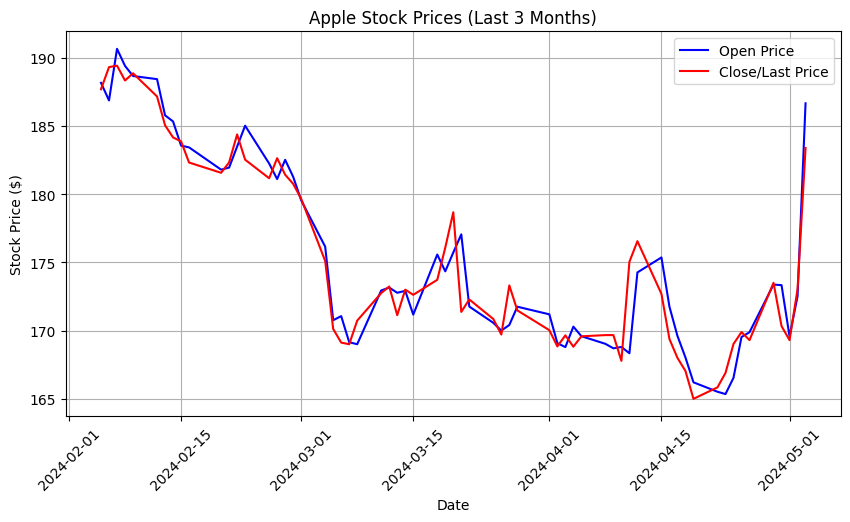

In [54]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data

# Plot Open vs Close price
plt.figure(figsize=(10, 5))
plt.plot(apple_last_three_months["Date"], apple_last_three_months["Open"], label="Open Price", color="blue")
plt.plot(apple_last_three_months["Date"], apple_last_three_months["Close/Last"], label="Close/Last Price", color="red")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("Apple Stock Prices (Last 3 Months)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

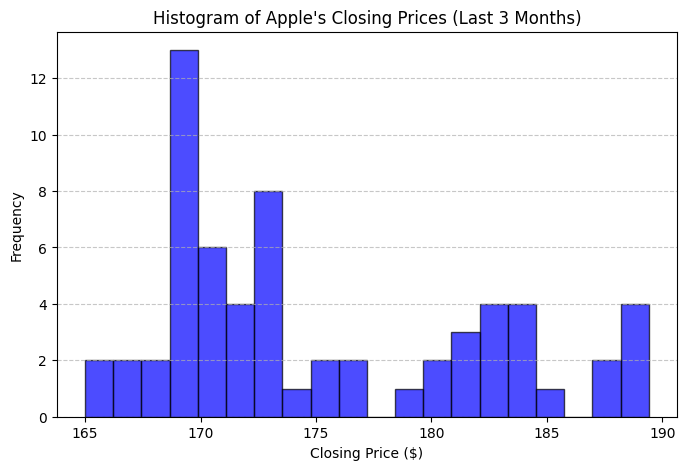

In [55]:
# Plot the histogram of Apple's closing price over the last 3 months 

import matplotlib.pyplot as plt

# Filter last three months of data
max_date = apple["Date"].max()
three_months_ago = max_date - pd.DateOffset(months=3)
apple_last_three_months = apple[apple["Date"] >= three_months_ago]

# Plot histogram of closing prices
plt.figure(figsize=(8, 5))
plt.hist(apple_last_three_months["Close/Last"], bins=20, color="blue", edgecolor="black", alpha=0.7)

# Formatting
plt.xlabel("Closing Price ($)")
plt.ylabel("Frequency")
plt.title("Histogram of Apple's Closing Prices (Last 3 Months)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [56]:
apple = apple.sort_index(ascending=False)  # Ensure dates are from earliest to newest

In [57]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low
2516,2014-05-06,21.23,373872650,21.49,21.59,21.23
2515,2014-05-07,21.15,282128727,21.26,21.33,20.99
2514,2014-05-08,21.00,228973884,21.01,21.23,20.94
2513,2014-05-09,20.91,291068564,20.88,20.94,20.73
2512,2014-05-12,21.17,212736019,20.98,21.20,20.98


In [58]:
apple.tail()

,Date,Close/Last,Volume,Open,High,Low
4,2024-04-29,173.50,68169420,173.37,176.03,173.10
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
0,2024-05-03,183.38,163224100,186.65,187.00,182.66


In [59]:
apple.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [60]:
microsoft = microsoft.sort_index(ascending=False)  # Ensure dates are from earliest to newest

In [61]:
microsoft.head()

,Date,Close/Last,Volume,Open,High,Low
2516,2014-05-06,39.060,27105700,39.29,39.35,38.95
2515,2014-05-07,39.425,41731030,39.22,39.51,38.51
2514,2014-05-08,39.640,32089010,39.34,39.90,38.97
2513,2014-05-09,39.540,29646100,39.54,39.85,39.37
2512,2014-05-12,39.970,22761620,39.74,40.02,39.65


In [62]:
microsoft.tail()

,Date,Close/Last,Volume,Open,High,Low
4,2024-04-29,402.25,19582090,405.25,406.3200,399.1900
3,2024-04-30,389.33,28781370,401.49,402.1600,389.1700
2,2024-05-01,394.94,23562480,392.61,401.7199,390.3100
1,2024-05-02,397.84,17709360,397.66,399.9300,394.6515
0,2024-05-03,406.66,17446720,402.28,407.1500,401.8600


In [63]:
microsoft.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [64]:
# Calculate daily returns for Apple and Microsoft
apple["Monthly_Return"] = apple["Close/Last"].pct_change()

microsoft["Monthly_Return"] = microsoft["Close/Last"].pct_change()

In [65]:
apple.isnull().sum()

Date              0
Close/Last        0
Volume            0
Open              0
High              0
Low               0
Monthly_Return    1
dtype: int64

In [66]:
# Drop rows with null values in the 'Daily_Return' column in place
apple.dropna(subset=['Monthly_Return'], inplace=True)

# Check the DataFrame after dropping null rows
apple.isnull().sum()

Date              0
Close/Last        0
Volume            0
Open              0
High              0
Low               0
Monthly_Return    0
dtype: int64

In [67]:
microsoft.isnull().sum()

Date              0
Close/Last        0
Volume            0
Open              0
High              0
Low               0
Monthly_Return    1
dtype: int64

In [68]:
# Drop rows with null values in the 'Daily_Return' column in place
microsoft.dropna(subset=['Monthly_Return'], inplace=True)

# Check the DataFrame after dropping null rows
microsoft.isnull().sum()

Date              0
Close/Last        0
Volume            0
Open              0
High              0
Low               0
Monthly_Return    0
dtype: int64

In [69]:
apple[["Date", "Monthly_Return"]].head()

,Date,Monthly_Return
2515,2014-05-07,-0.003768
2514,2014-05-08,-0.007092
2513,2014-05-09,-0.004286
2512,2014-05-12,0.012434
2511,2014-05-13,0.001889


In [70]:
microsoft[["Date", "Monthly_Return"]].head()

,Date,Monthly_Return
2515,2014-05-07,0.009345
2514,2014-05-08,0.005453
2513,2014-05-09,-0.002523
2512,2014-05-12,0.010875
2511,2014-05-13,0.011258


In [71]:
inflation_monthend.head()

,Date,CORESTICKM159SFRBATL
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


In [72]:
# microsoft = microsoft.sort_index(ascending=False)  # Ensure dates are from earliest to newest

In [73]:
inflation_monthend.tail()

,Date,CORESTICKM159SFRBATL
670,2023-11-30,4.688293
671,2023-12-31,4.554396
672,2024-01-31,4.603922
673,2024-02-29,4.403102
674,2024-03-31,4.509212


In [74]:
# Calculate monthly percentage change in inflation

inflation_monthend["Inflation_Change"] = inflation_monthend["CORESTICKM159SFRBATL"].pct_change()

inflation_monthend[["Date", "Inflation_Change"]].head()

,Date,Inflation_Change
0,1968-01-31,NaN
1,1968-02-29,0.006013
2,1968-03-31,0.127482
3,1968-04-30,0.003299
4,1968-05-31,-0.016262


In [75]:
# Drop rows with null values in the 'Daily_Return' column in place
inflation_monthend.dropna(subset=['Inflation_Change'], inplace=True)

# Check the DataFrame after dropping null rows
inflation_monthend.isnull().sum()

Date                    0
CORESTICKM159SFRBATL    0
Inflation_Change        0
dtype: int64

In [76]:
inflation_monthend.head()

,Date,CORESTICKM159SFRBATL,Inflation_Change
1,1968-02-29,3.673819,0.006013
2,1968-03-31,4.142164,0.127482
3,1968-04-30,4.155828,0.003299
4,1968-05-31,4.088245,-0.016262
5,1968-06-30,4.545569,0.111863


In [77]:
apple.isnull().sum()

Date              0
Close/Last        0
Volume            0
Open              0
High              0
Low               0
Monthly_Return    0
dtype: int64

In [78]:
microsoft.head()

,Date,Close/Last,Volume,Open,High,Low,Monthly_Return
2515,2014-05-07,39.425,41731030,39.22,39.51,38.51,0.009345
2514,2014-05-08,39.640,32089010,39.34,39.90,38.97,0.005453
2513,2014-05-09,39.540,29646100,39.54,39.85,39.37,-0.002523
2512,2014-05-12,39.970,22761620,39.74,40.02,39.65,0.010875
2511,2014-05-13,40.420,26994040,39.92,40.50,39.85,0.011258


In [79]:
microsoft.isnull().sum()

Date              0
Close/Last        0
Volume            0
Open              0
High              0
Low               0
Monthly_Return    0
dtype: int64

In [80]:
inflation_monthend.isnull().sum()

Date                    0
CORESTICKM159SFRBATL    0
Inflation_Change        0
dtype: int64

### 2. Interpolate stock returns from daily to monthly

In [81]:
apple.shape

(2516, 7)

In [82]:
microsoft.shape

(2516, 7)

In [83]:
inflation_monthend.shape

(674, 3)

In [84]:
apple_df = apple.copy()
microsoft_df = microsoft.copy()

# Set Date as index
apple_df.set_index('Date', inplace=True)
microsoft_df.set_index('Date', inplace=True)

# Resample daily returns to monthly and interpolate missing values
# Calculate monthly returns by compounding daily returns
apple_monthly = apple_df['Monthly_Return'].resample('M').apply(lambda x: (1 + x).prod() - 1)

# microsoft_monthly = microsoft_df['Daily_Return'].resample('ME').interpolate(method='linear')
microsoft_monthly = microsoft_df['Monthly_Return'].resample('M').apply(lambda x: (1 + x).prod() - 1)

# Reset index to retain 'Date' as a column
apple_monthly = apple_monthly.reset_index()
microsoft_monthly = microsoft_monthly.reset_index()


In [85]:
apple_monthly.head()

,Date,Monthly_Return
0,2014-05-31,0.065002
1,2014-06-30,0.027421
2,2014-07-31,0.028842
3,2014-08-31,0.072385
4,2014-09-30,-0.017167


In [86]:
microsoft_monthly.head()

,Date,Monthly_Return
0,2014-05-31,0.048131
1,2014-06-30,0.018564
2,2014-07-31,0.035012
3,2014-08-31,0.052595
4,2014-09-30,0.020471


In [87]:
apple_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            121 non-null    datetime64[ns]
 1   Monthly_Return  121 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [88]:
microsoft_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            121 non-null    datetime64[ns]
 1   Monthly_Return  121 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [89]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  675 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  675 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


### 3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe

In [90]:
# Merge datasets on Date
merged_data = apple_monthly.merge(microsoft_monthly, on='Date', suffixes=('_Apple', '_Microsoft'))

merged_apple_microsoft = merged_data.merge(inflation_monthend[['Date', 'Inflation_Change']], on='Date', how='inner')

merged_apple_microsoft.head()

,Date,Monthly_Return_Apple,Monthly_Return_Microsoft,Inflation_Change
0,2014-05-31,0.065002,0.048131,0.050251
1,2014-06-30,0.027421,0.018564,0.007147
2,2014-07-31,0.028842,0.035012,-0.020724
3,2014-08-31,0.072385,0.052595,-0.066387
4,2014-09-30,-0.017167,0.020471,-0.004516


### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [93]:
# Calculate correlation matrix

correlation_matrix = merged_apple_microsoft[['Monthly_Return_Apple', 'Monthly_Return_Microsoft', 'Inflation_Change']].corr()

### 5. Plot the correlation matrix as a heatmap

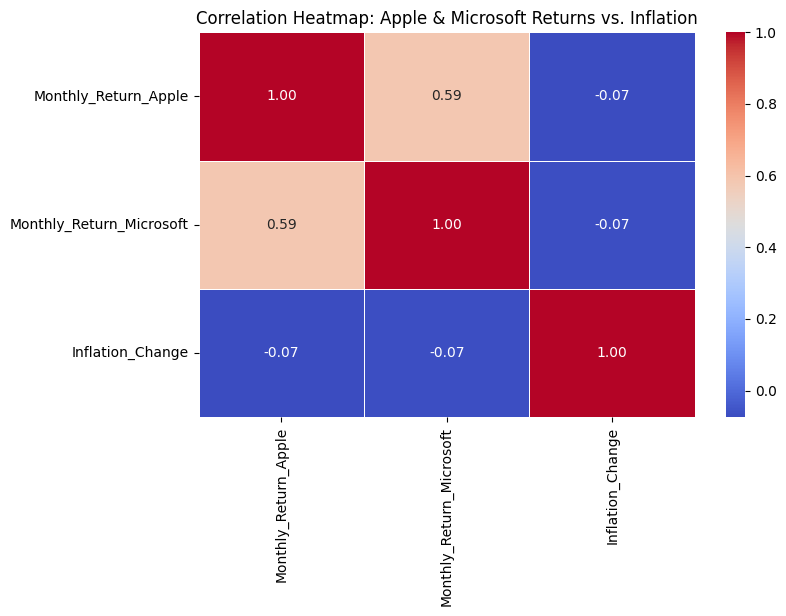

In [94]:
# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Formatting
plt.title("Correlation Heatmap: Apple & Microsoft Returns vs. Inflation")
plt.show()

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [95]:
# Define the window size for the rolling calculation (e.g., 7 days for one week)
window_size = 7

In [96]:
# apple.columns

In [97]:
# apple.head()

In [98]:
# Calculate the end date for the last 3 months=
# end_date = apple['Date'].max()  # Take the latest date in the DataFrame
# start_date = end_date - pd.DateOffset(months=3)  # Subtract 3 months

In [99]:
# end_date

In [100]:
# start_date

In [101]:
# # Filter the DataFrame to get data from the last 3 months
# apple_last_3_months = apple[apple['Date'] >= start_date]
# apple_last_3m = apple_last_3_months.copy()

In [102]:
# apple.head()

In [103]:
apple_last_three_months.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10


In [104]:
apple_last_three_months.shape

(63, 6)

In [105]:
# apple_last_three_months.head()

In [106]:
rolling_std = apple_last_three_months.copy()
# apple_last_3m = apple_last_3_months.copy()

In [107]:
# Calculate rolling one-week volatility (rolling standard deviation)
rolling_std['Rolling_Std_Dev'] = apple_last_three_months['Close/Last'].rolling(window=window_size).std()

In [108]:
rolling_std.head(10)

,Date,Close/Last,Volume,Open,High,Low,Rolling_Std_Dev
0,2024-05-03,183.38,163224100,186.65,187.00,182.66,NaN
1,2024-05-02,173.03,94214920,172.51,173.42,170.89,NaN
2,2024-05-01,169.30,50383150,169.58,172.71,169.11,NaN
3,2024-04-30,170.33,65934780,173.33,174.99,170.00,NaN
4,2024-04-29,173.50,68169420,173.37,176.03,173.10,NaN
5,2024-04-26,169.30,44838350,169.88,171.34,169.18,NaN
6,2024-04-25,169.89,50558330,169.53,170.61,168.15,5.023946
7,2024-04-24,169.02,48251840,166.54,169.30,166.21,1.860294
8,2024-04-23,166.90,49537760,165.35,167.05,164.92,1.978168
9,2024-04-22,165.84,48116440,165.52,167.26,164.77,2.478049


In [110]:
rolling_std = rolling_std.dropna(subset=['Rolling_Std_Dev'])

In [111]:
rolling_std.head(10)

,Date,Close/Last,Volume,Open,High,Low,Rolling_Std_Dev
6,2024-04-25,169.89,50558330,169.53,170.61,168.15,5.023946
7,2024-04-24,169.02,48251840,166.54,169.30,166.21,1.860294
8,2024-04-23,166.90,49537760,165.35,167.05,164.92,1.978168
9,2024-04-22,165.84,48116440,165.52,167.26,164.77,2.478049
10,2024-04-19,165.00,68149380,166.21,166.40,164.08,2.878881
11,2024-04-18,167.04,43122900,168.03,168.64,166.55,1.862140
12,2024-04-17,168.00,50901210,169.61,170.65,168.00,1.720270
13,2024-04-16,169.38,73711240,171.75,173.76,168.27,1.603282
14,2024-04-15,172.69,73531770,175.36,176.63,172.50,2.566086
15,2024-04-12,176.55,101670900,174.26,178.36,174.21,4.108300


In [112]:
rolling_std.tail()

,Date,Close/Last,Volume,Open,High,Low,Rolling_Std_Dev
58,2024-02-09,188.85,45155220,188.65,189.99,188.00,2.579417
59,2024-02-08,188.32,40962050,189.39,189.54,187.35,2.469760
60,2024-02-07,189.41,53438960,190.64,191.05,188.61,2.313552
61,2024-02-06,189.30,43490760,186.86,189.31,186.77,2.112203
62,2024-02-05,187.68,69668820,188.15,189.25,185.84,1.531914


In [114]:
rolling_std.shape

(57, 7)

In [126]:
# apple_last_3m.shape

In [127]:
# apple_last_3m.tail()

In [115]:
rolling_std.isnull().sum()

Date               0
Close/Last         0
Volume             0
Open               0
High               0
Low                0
Rolling_Std_Dev    0
dtype: int64

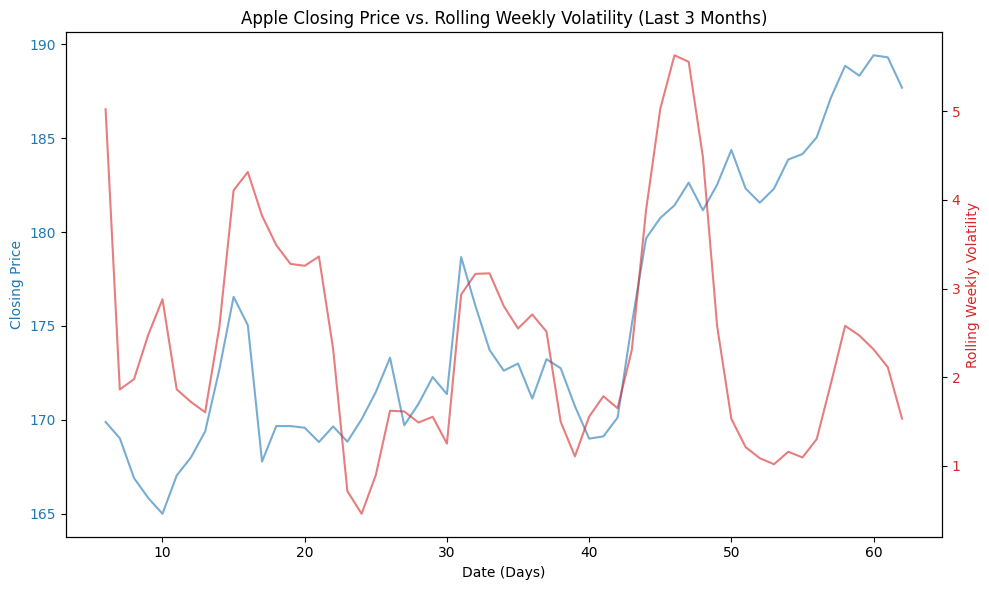

In [116]:
# last_three_months_apple

# Plot the closing price and rolling volatility on different y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the closing price
ax1.plot(rolling_std.index, rolling_std['Close/Last'], color='tab:blue', label='Closing Price', alpha=0.6)
ax1.set_xlabel('Date (Days)')
ax1.set_ylabel('Closing Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the rolling volatility
ax2 = ax1.twinx()
ax2.plot(rolling_std.index, rolling_std['Rolling_Std_Dev'], color='tab:red', label='Rolling Volatility', alpha=0.6)
ax2.set_ylabel('Rolling Weekly Volatility', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout adjustments
plt.title('Apple Closing Price vs. Rolling Weekly Volatility (Last 3 Months)')
fig.tight_layout()

# Show the plot
plt.show()

## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [124]:
import os

# Define the folder path
folder_path = "modified_data"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)


In [125]:
!ls

data_analysis.ipynb modified_data       p1.zip


In [126]:
# List of DataFrames and corresponding file names
dataframes = {
    "gdp.csv": gdp,
    "apple.csv": apple,
    "microsoft.csv": microsoft,
    "consumer.csv": consumer,
    "inflation_monthend.csv": inflation,
    "inflation_monthend.csv": rolling_std,
    "quarterly_inflation.csv": quarterly_inflation,
    "weekly_inflation.csv": weekly_inflation,
    "apple_last_three_months.csv": apple_last_three_months,
    "apple_monthly.csv": apple_monthly,
    "microsoft_monthly.csv": microsoft_monthly,
    "merged_apple_microsoft.csv": merged_apple_microsoft,
    "correlation_matrix.csv": correlation_matrix,
    "rolling_std.csv": rolling_std,  
}

# Save each DataFrame in the specified folder
for filename, df in dataframes.items():
    file_path = os.path.join(folder_path, filename)  # Create full file path
    df.to_csv(file_path, index=False)  # Save without index


In [127]:
# List files in the folder
os.listdir(folder_path)

['quarterly_inflation.csv',
 'apple_monthly.csv',
 'apple_last_three_months.csv',
 'rolling_std.csv',
 'apple.csv',
 'microsoft_monthly.csv',
 'microsoft.csv',
 'weekly_inflation.csv',
 'merged_apple_microsoft.csv',
 'inflation_monthend.csv',
 'consumer.csv',
 'gdp.csv',
 'correlation_matrix.csv']